In [1]:
from rich import print
text = "Task 3  Exploratory Data Analysis-Retail"
author = "Author: Raghav Anil Pillai"
formatted_text = f"[size=16]{text}[/size]\n[bold]{author}[/bold]"
print(formatted_text)

Task 3  Exploratory Data Analysis-Retail
Author: Raghav Anil Pillai

In [114]:
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

In [115]:
file_path = 'D:\DandBAproj\Exploratory Data Analysis-Retail\SampleSuperstore.csv'

In [116]:
data= pd.read_csv(file_path)

In [117]:
sample_data = data.sample(3)
def hc(val):
    return f'background-color: grey; color: white; font-family:"Times New Roman",Times, serif;'
styled_df = sample_data.style.applymap(hc)
styled_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9356,Standard Class,Home Office,United States,Jackson,Michigan,49201,Central,Office Supplies,Paper,18.540000,2,0.000000,8.713800
8126,Standard Class,Consumer,United States,Houston,Texas,77070,Central,Technology,Accessories,18.528000,2,0.200000,4.400400
6122,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Storage,61.568000,2,0.200000,4.617600


In [118]:
sample_data = data.head(6)
def hc(val):
    return f'background-color: grey; color: white; font-family:"Times New Roman", Times, serif;'
styled_data = sample_data.style.applymap(hc)
styled_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2,0.000000,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940000,3,0.000000,219.582000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2,0.000000,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577500,5,0.450000,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2,0.200000,2.516400
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860000,7,0.000000,14.169400


In [119]:
sample_data = data.tail(9)
def hc(val):
    return f'background-color: grey; color: white; font-family:"Times New Roman", Times, serif;'
styled_data = sample_data.style.applymap(hc)
styled_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600000,4,0.000000,16.124000
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240000,1,0.000000,15.220800
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990000,1,0.000000,28.796400
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100000,5,0.000000,55.647000
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248000,3,0.200000,4.102800
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960000,2,0.000000,15.633200
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576000,2,0.200000,19.393200
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600000,4,0.000000,13.320000
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160000,2,0.000000,72.948000


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [121]:
column_list = data.columns.tolist()
print(column_list)

[
    'Ship Mode',
    'Segment',
    'Country',
    'City',
    'State',
    'Postal Code',
    'Region',
    'Category',
    'Sub-Category',
    'Sales',
    'Quantity',
    'Discount',
    'Profit'
]

In [122]:
nunique_data = data.nunique()
def hc(val):
    return f'background-color: grey; color: white; font-family: "Times New Roman", Times, serif;'
styled_nunique_data = nunique_data.to_frame().style.applymap(hc)
styled_nunique_data

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


In [123]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

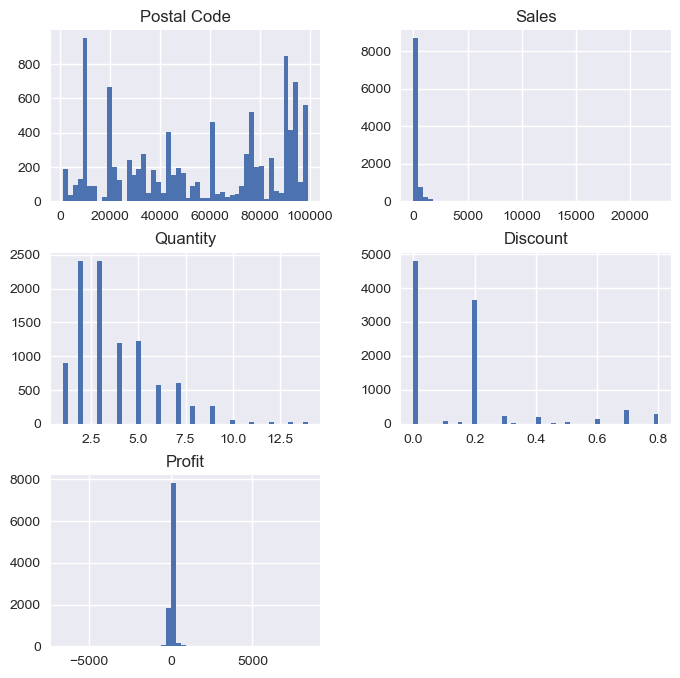

In [124]:
data.hist(bins=50, figsize=(8,8))
plt.show()

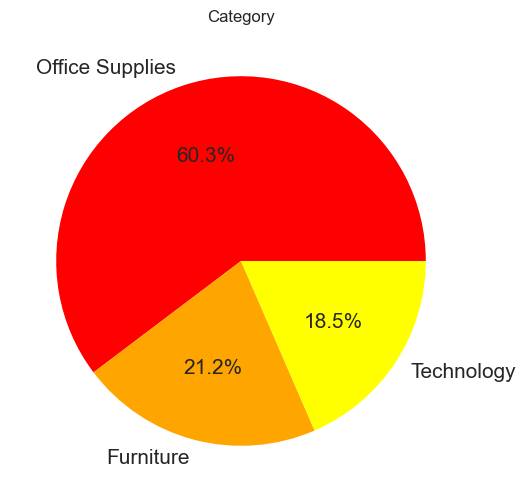

In [125]:
plt.figure(figsize=(6, 6))
textprops = {"fontsize": 15}
plt.title('Category')
categories = data['Category'].value_counts()
colors = ['red', 'orange', 'yellow']  
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', textprops=textprops, colors=colors)
plt.show()

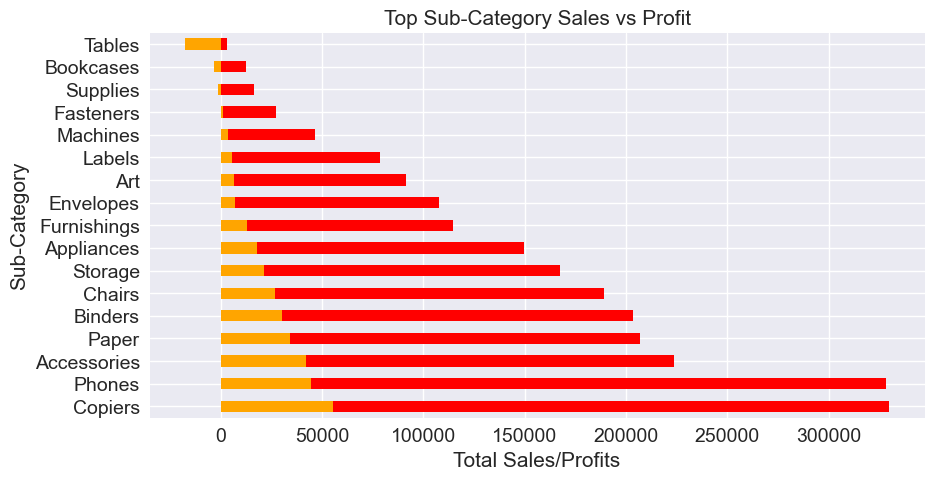

In [126]:
top_subcategory_s = data.groupby("Sub-Category").Sales.sum().nlargest(n=100)
top_subcategory_p = data.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_subcategory_s.plot(kind='barh', figsize=(10, 5), fontsize=14, color='red')
top_subcategory_p.plot(kind='barh', figsize=(10, 5), fontsize=14, color='orange')
plt.xlabel('Total Sales/Profits', fontsize=15)
plt.ylabel('Sub-Category', fontsize=15)
plt.title("Top Sub-Category Sales vs Profit", fontsize=15)
plt.show()

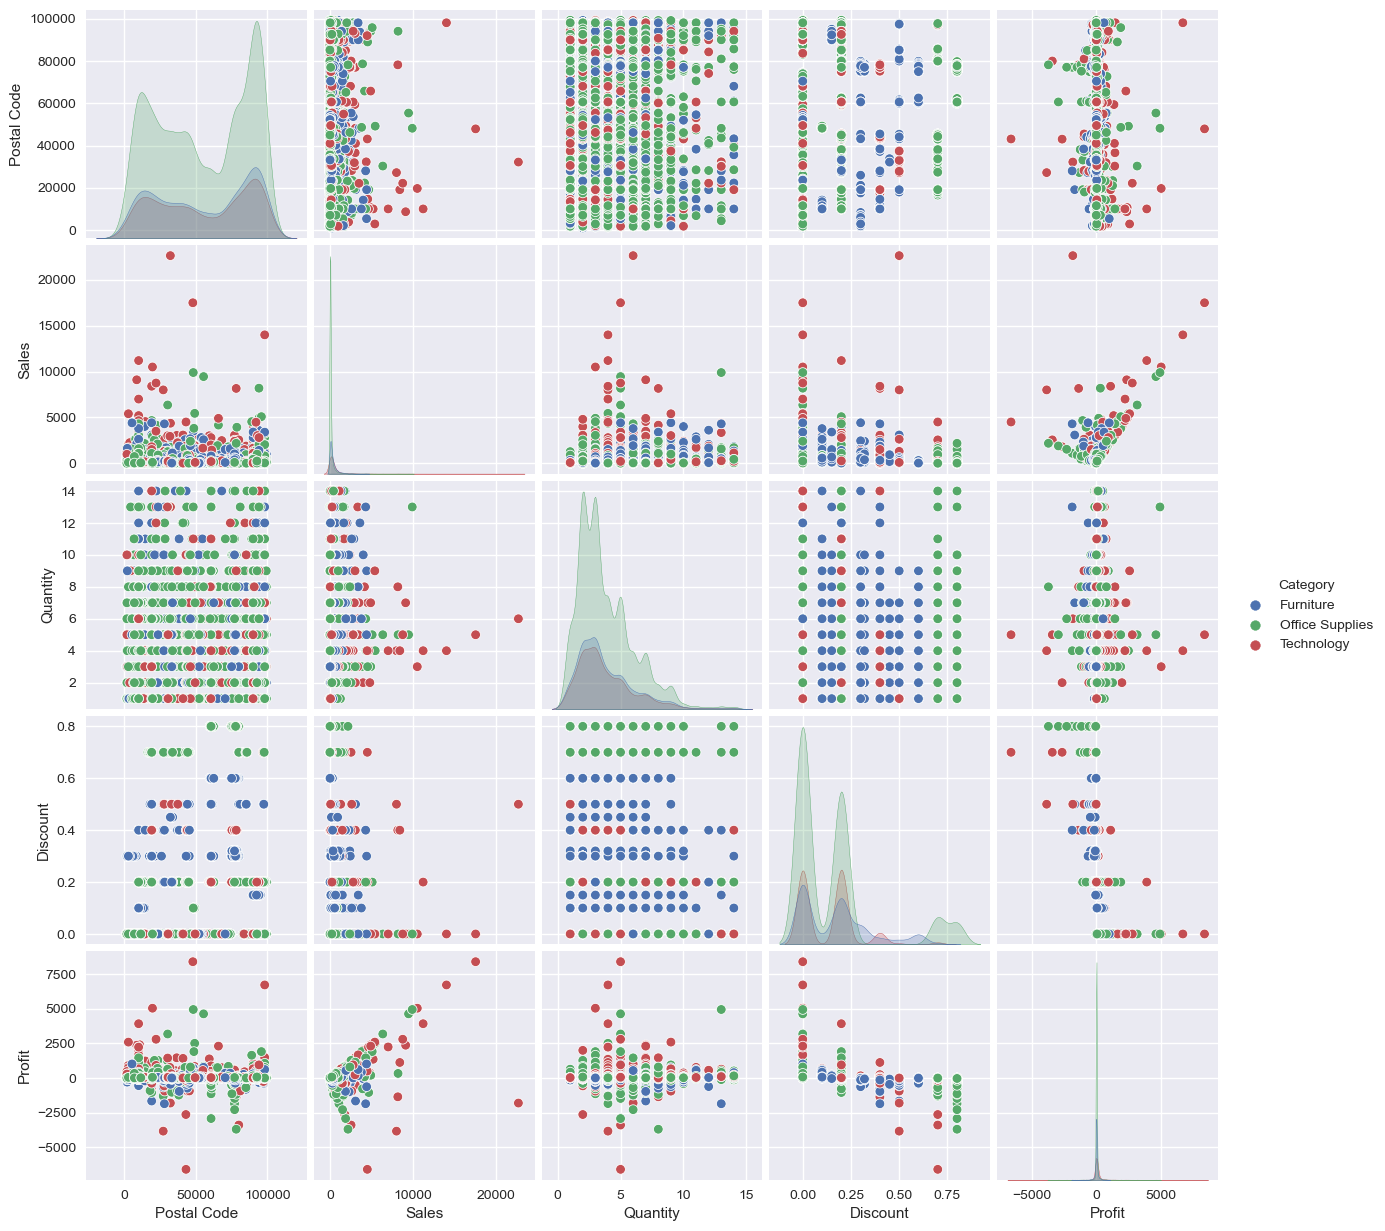

In [127]:
sns.pairplot(data,hue='Category')

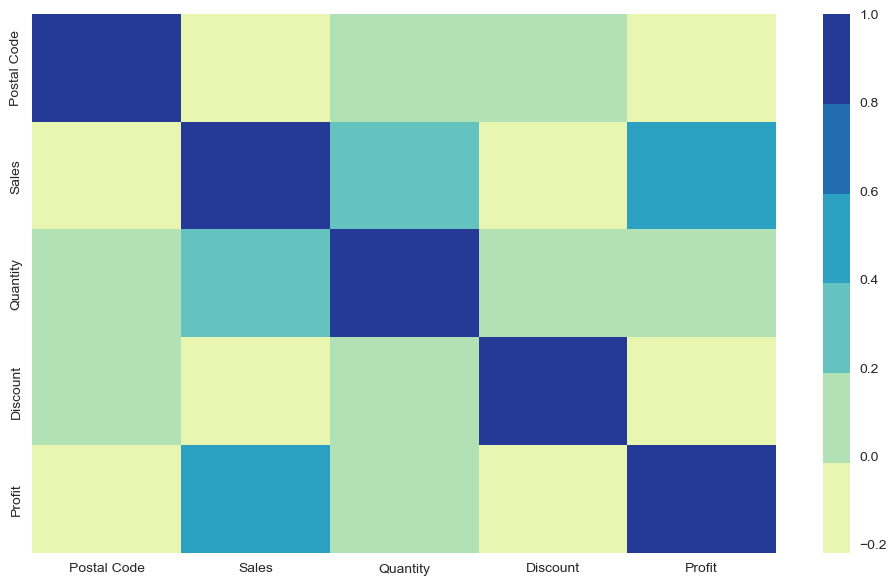

In [128]:
c_cmap = sns.color_palette("YlGnBu")
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
sns.heatmap(data.corr(), cmap=c_cmap)
plt.show()

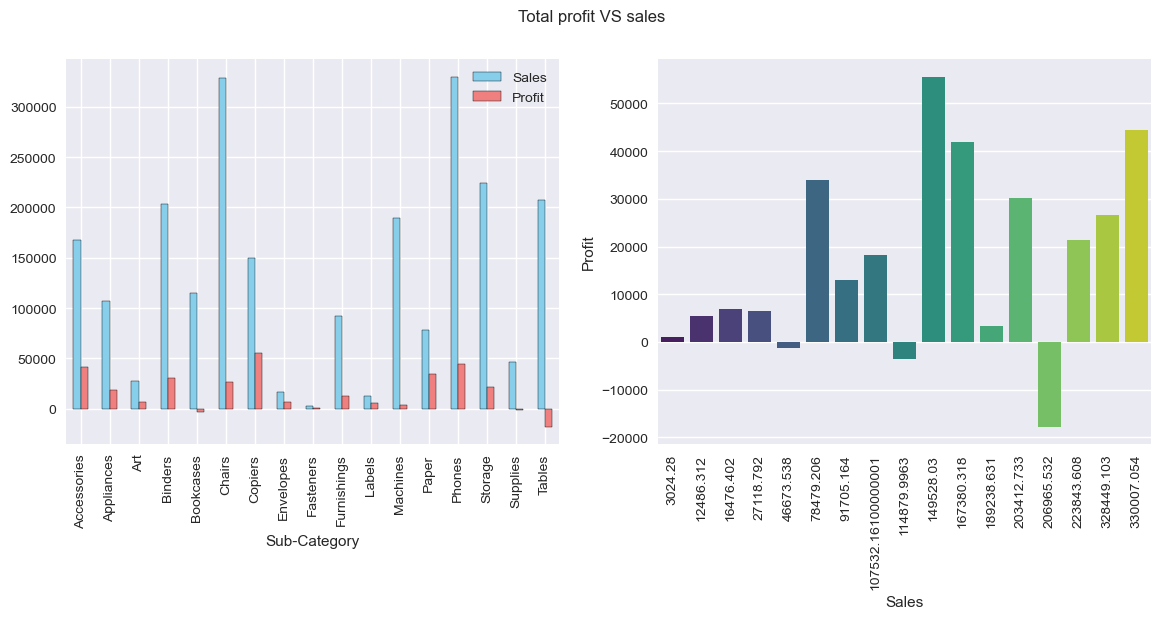

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Total profit VS sales")

# Bar plot using seaborn with modified color palette
sns.barplot(data=data.groupby('Sub-Category')['Sales', 'Profit'].agg(sum), x='Sales', y='Profit', ax=axes[1], palette="viridis")

# Bar plot using pandas with modified color palette and edge color
df_plot = data.groupby('Sub-Category')['Sales', 'Profit'].agg(sum)
df_plot.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'], edgecolor='black')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()


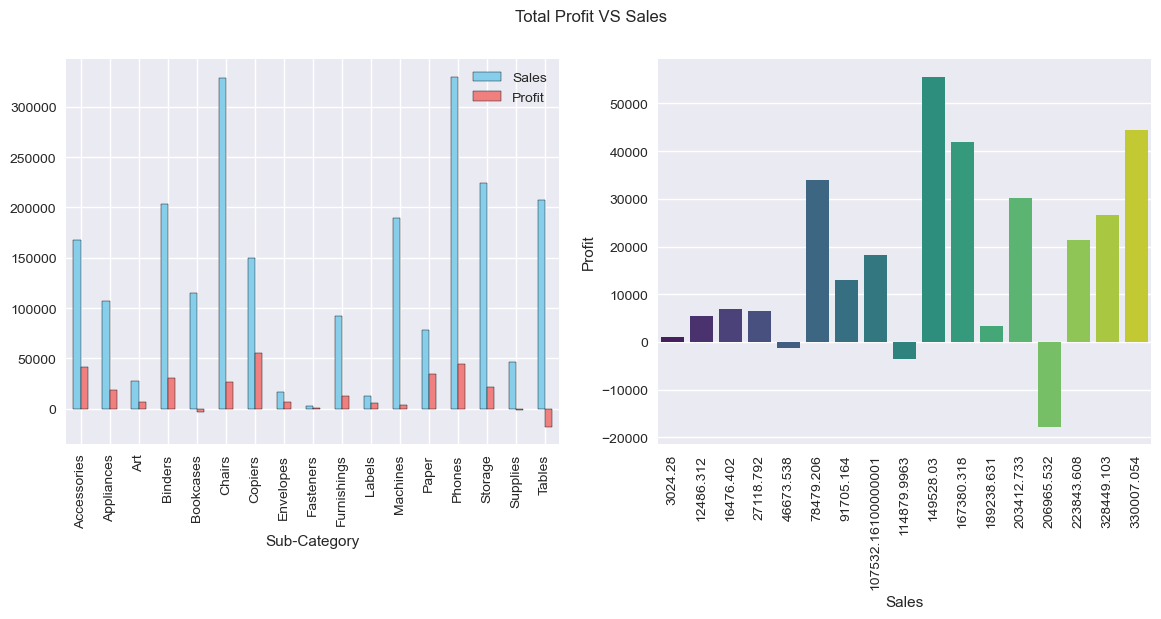

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Total Profit VS Sales")
sns.barplot(data=data.groupby('Sub-Category')['Sales', 'Profit'].agg(sum), x='Sales', y='Profit', ax=axes[1], palette="viridis")
df_plot = data.groupby('Sub-Category')['Sales', 'Profit'].agg(sum)
df_plot.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'], edgecolor='black')
plt.xticks(rotation=90)
plt.show()


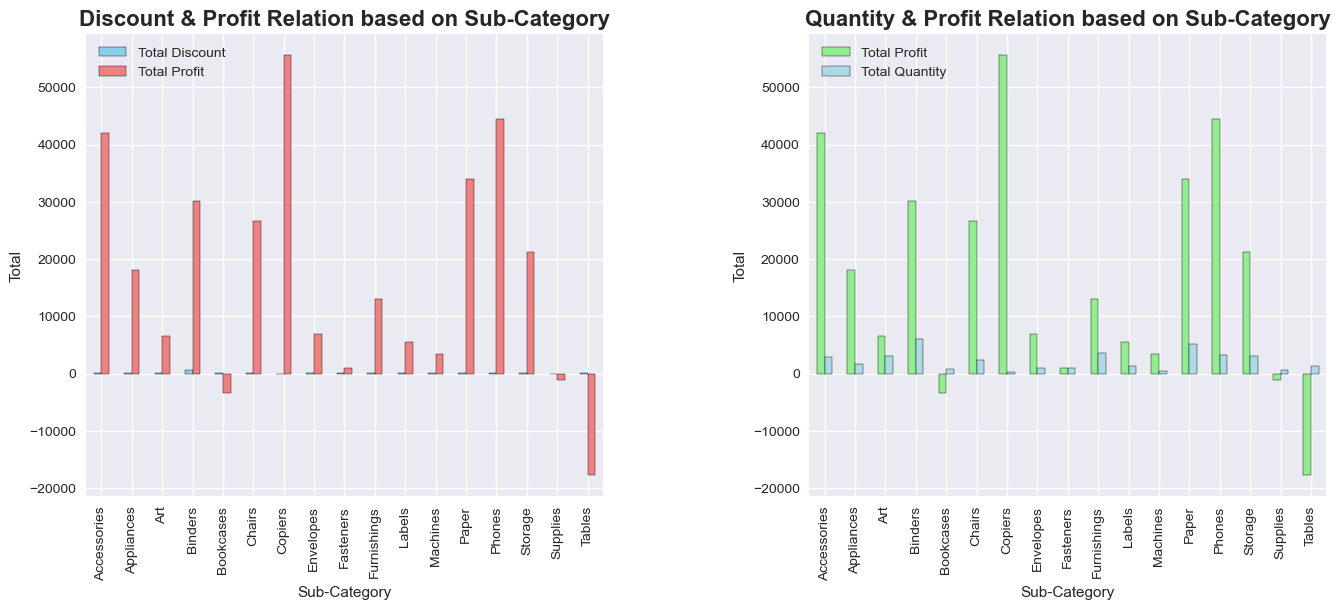

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
title_font = {'fontsize': 16, 'fontweight': 'bold'}  
data.groupby('Sub-Category')['Discount', 'Profit'].agg(sum).plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'], edgecolor='black')
axes[0].set_title('Discount & Profit Relation based on Sub-Category', fontdict=title_font)
axes[0].set_xlabel('Sub-Category')
axes[0].set_ylabel('Total')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(['Total Discount', 'Total Profit'], loc='upper left')  
data.groupby('Sub-Category')['Profit', 'Quantity'].agg(sum).plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightblue'], edgecolor='black')
axes[1].set_title('Quantity & Profit Relation based on Sub-Category', fontdict=title_font)
axes[1].set_xlabel('Sub-Category')
axes[1].set_ylabel('Total')
axes[1].tick_params(axis='x', rotation=90)  
axes[1].legend(['Total Profit', 'Total Quantity'], loc='upper left')
plt.subplots_adjust(wspace=0.4)
plt.show()


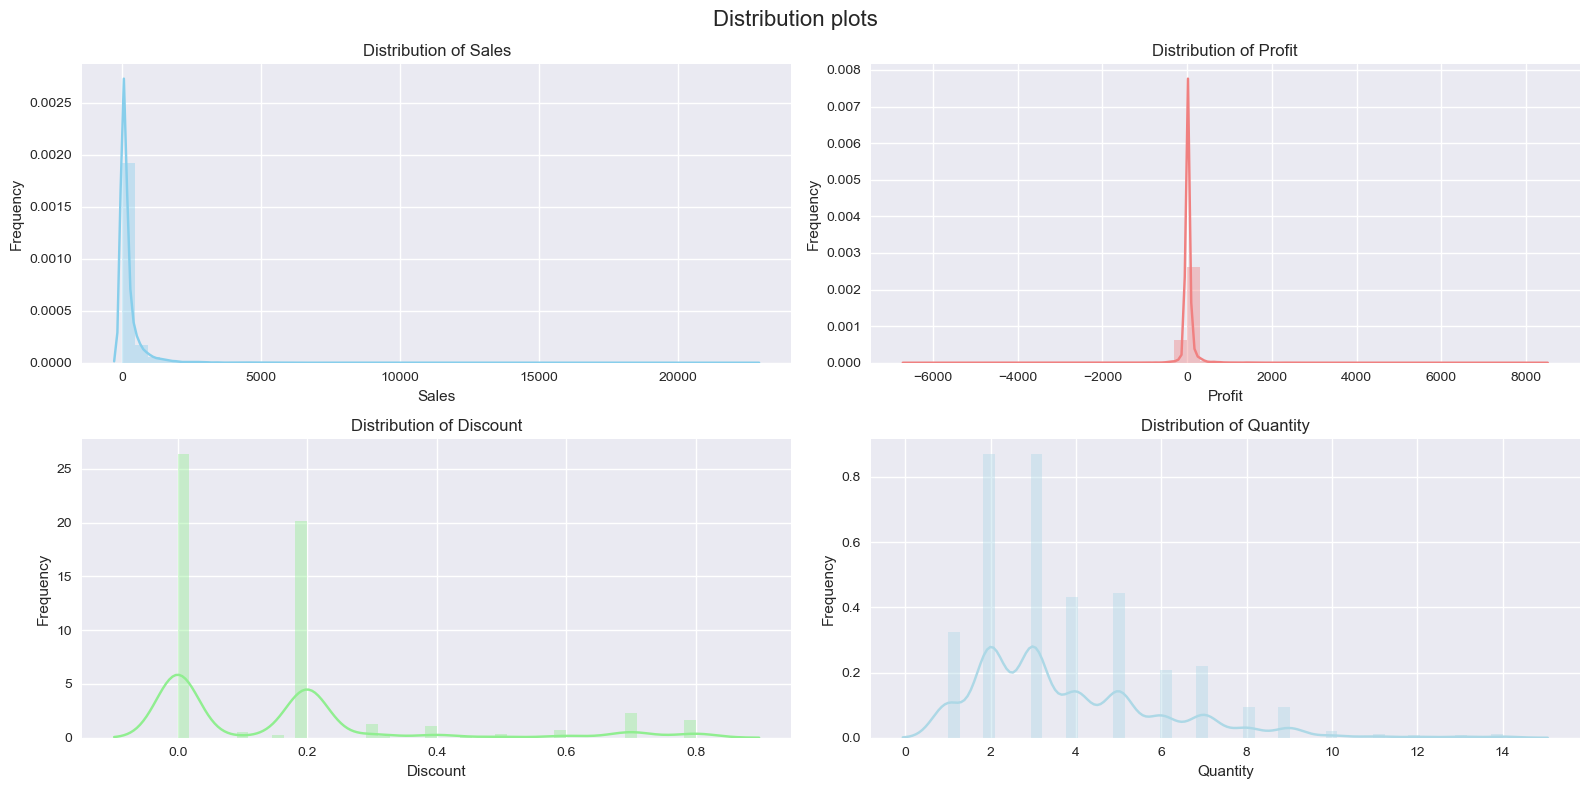

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(data['Sales'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Sales')
sns.distplot(data['Profit'], ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_xlabel('Profit')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Profit')
sns.distplot(data['Discount'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_xlabel('Discount')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Discount')

sns.distplot(data['Quantity'], ax=axes[1, 1], color='lightblue')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Quantity')

plt.tight_layout()
plt.show()


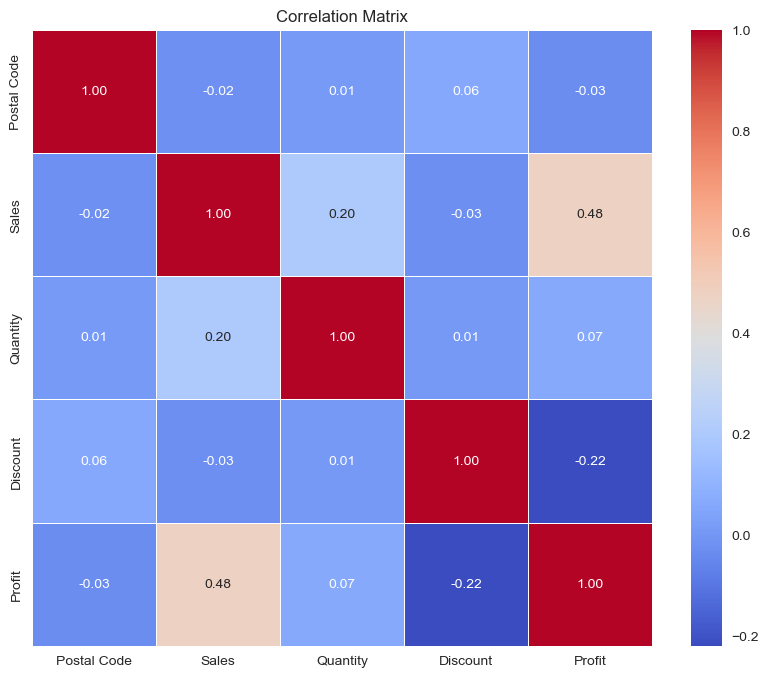

In [133]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

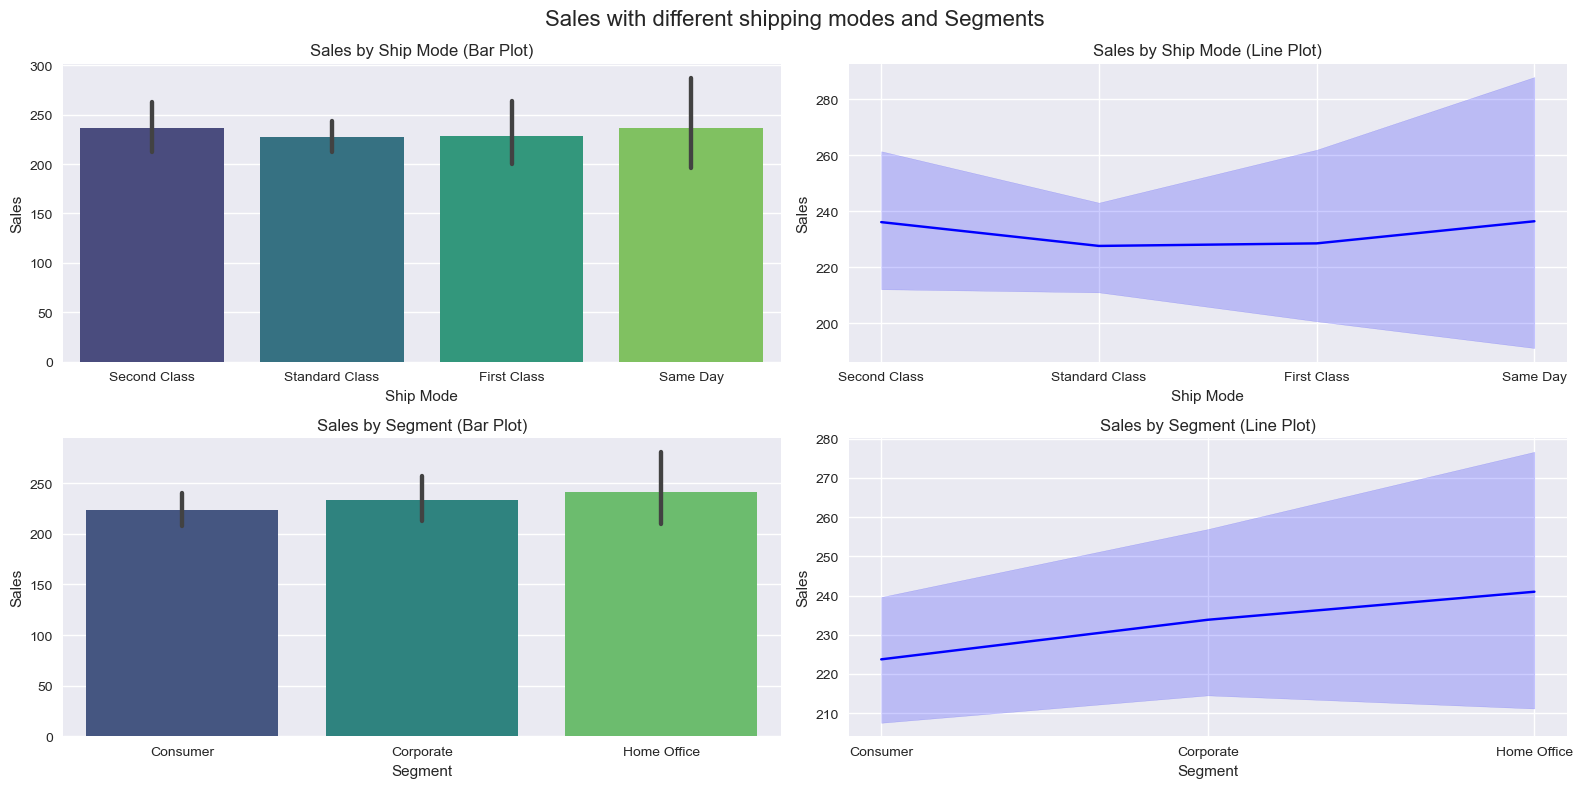

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(data=data, x='Ship Mode', y='Sales', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_xlabel('Ship Mode')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].set_title('Sales by Ship Mode (Bar Plot)')
sns.lineplot(data=data, x='Ship Mode', y='Sales', ax=axes[0, 1], color='blue')
axes[0, 1].set_xlabel('Ship Mode')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].set_title('Sales by Ship Mode (Line Plot)')
sns.barplot(data=data, x='Segment', y='Sales', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].set_title('Sales by Segment (Bar Plot)')
sns.lineplot(data=data, x='Segment', y='Sales', ax=axes[1, 1], color='blue')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].set_title('Sales by Segment (Line Plot)')

plt.tight_layout()
plt.show()